In [4]:
import numpy as np
import pandas as pd


full_test = pd.read_csv("test.csv", index_col='id')
full_train = pd.read_csv("train.csv", index_col='id')
test_sz = full_test.sat_id.nunique()

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [3]:
train_coefs = pd.DataFrame({'sat_id': full_test.sat_id.unique(), 'A': np.zeros(test_sz),
                            'B': np.zeros(test_sz), 'C': np.zeros(test_sz), 'D': np.zeros(test_sz)})

In [ ]:
from random import shuffle

In [ ]:
np.random.seed(31415)

In [6]:
from sklearn.linear_model import LinearRegression


for sat_id in train_coefs.sat_id:
    # print(sat_id)
    df = full_train[full_train.sat_id == sat_id]
    n = 0; i = 0
    
    a = np.zeros(df.shape[0] // 3); b = np.zeros(df.shape[0] // 3)
    c = np.zeros(df.shape[0] // 3); d = np.zeros(df.shape[0] // 3)

    p1 = df[['x', 'y', 'z']].sample(frac=1).values
    p2 = df[['x', 'y', 'z']].sample(frac=1).values
    p3 = df[['x', 'y', 'z']].sample(frac=1).values
       
    v1 = p3 - p1
    v2 = p2 - p1
 
    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    sgn_ = 2 * (cp[:, 0] >= 0) - 1
    cp *= sgn_.reshape(-1, 1)
    a, b, c = cp[:, 0], cp[:, 1], cp[:, 2]
   
    norm = np.sqrt(a ** 2 + b ** 2 + c ** 2)
 
    a /= norm
    b /= norm
    c /= norm
    
    d = -(a * p1[:, 0] + b * p1[:, 1] + c * p1[:, 2])
 
    train_coefs.loc[train_coefs.sat_id == sat_id, 'A'] = np.nanmedian(a)
    train_coefs.loc[train_coefs.sat_id == sat_id, 'B'] = np.nanmedian(b)
    train_coefs.loc[train_coefs.sat_id == sat_id, 'C'] = np.nanmedian(c)
    train_coefs.loc[train_coefs.sat_id == sat_id, 'D'] = np.nanmedian(d)

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [7]:
train_coefs.head()

sat_id         A         B         C           D
0       1  0.105813 -0.506322 -0.830986  428.095768
1       2  0.272114  0.582492  0.765522    0.417844
2       3  0.043096  0.024531 -0.998760  -11.926576
3       4  0.153223 -0.843987  0.513590   10.014767
4       6  0.274336  0.515361 -0.811837   -5.018759

In [8]:
#train_coefs.to_csv("ABCD.csv", index=False)

In [9]:
abs(train_coefs.C).min()

0.007037690900878411

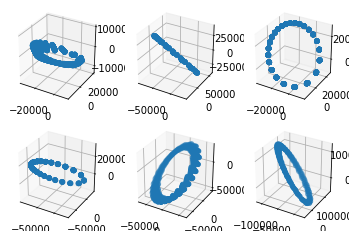

In [10]:
# %matplotlib notebook - for moving
fig = plt.figure()
ax = fig.add_subplot(231, projection='3d')
ax.scatter(full_train[full_train.sat_id == 1].x, full_train[full_train.sat_id == 1].y, full_train[full_train.sat_id == 1].z)

ax = fig.add_subplot(232, projection='3d')
ax.scatter(full_train[full_train.sat_id == 2].x, full_train[full_train.sat_id == 2].y, full_train[full_train.sat_id == 2].z)

ax = fig.add_subplot(233, projection='3d')
ax.scatter(full_train[full_train.sat_id == 579].x, full_train[full_train.sat_id == 579].y, full_train[full_train.sat_id == 579].z)

ax = fig.add_subplot(234, projection='3d')
ax.scatter(full_train[full_train.sat_id == 596].x, full_train[full_train.sat_id == 596].y, full_train[full_train.sat_id == 596].z)

ax = fig.add_subplot(235, projection='3d')
ax.scatter(full_train[full_train.sat_id == 6].x, full_train[full_train.sat_id == 6].y, full_train[full_train.sat_id == 6].z)

ax = fig.add_subplot(236, projection='3d')
ax.scatter(full_train[full_train.sat_id == 20].x, full_train[full_train.sat_id == 20].y, full_train[full_train.sat_id == 20].z)


In [8]:
train_coefs = pd.read_csv('ABCD.csv')
train_coefs.head()

A         B         C           D  sat_id
0  0.105813 -0.506322 -0.830986  428.095768       1
1  0.272114  0.582492  0.765522    0.417844       2
2  0.043096  0.024531 -0.998760  -11.926576       3
3  0.153223 -0.843987  0.513590   10.014767       4
4  0.274336  0.515361 -0.811837   -5.018759       6

In [9]:
A = train_coefs[train_coefs.sat_id == 1]['A'][0]
A

0.1058128009454192

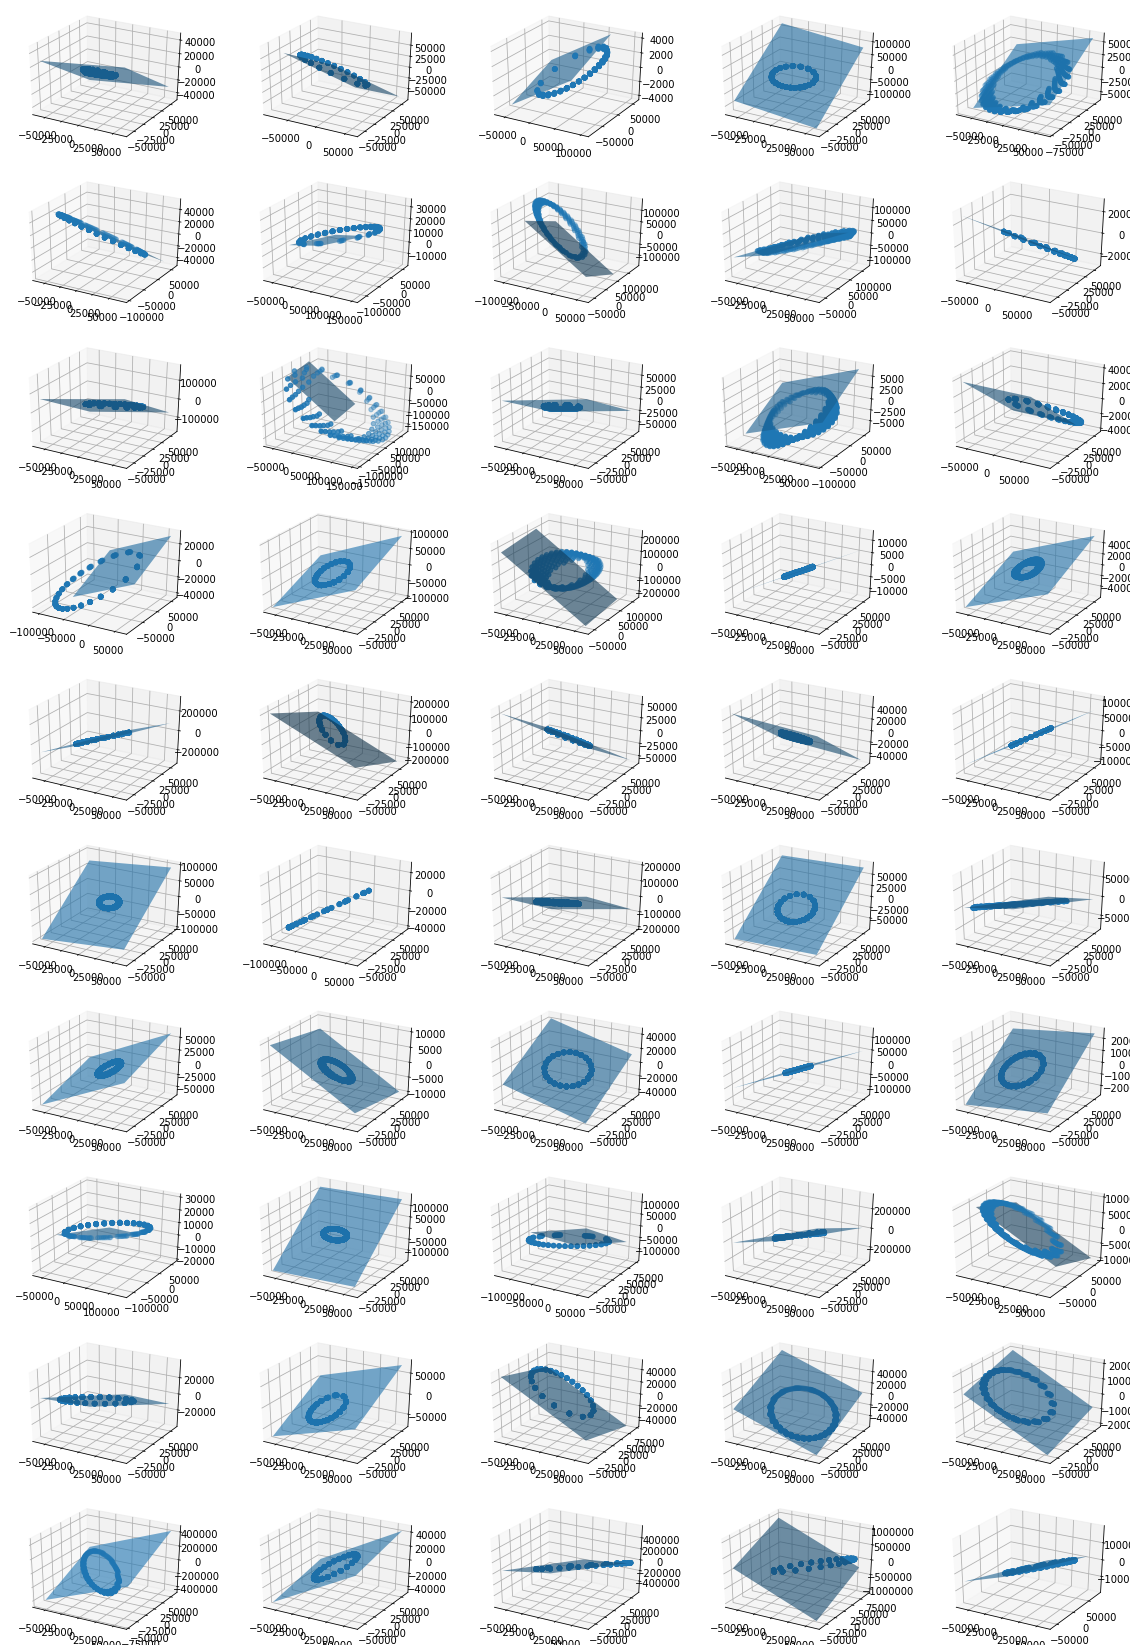

In [13]:
# %matplotlib notebook
fig = plt.figure(figsize=(20, 30))

i = 1
for sat_id in full_test.sat_id.unique()[:]:
    ax = fig.add_subplot(10, 5, i, projection='3d')
    
    xx, yy = np.meshgrid([-60000, 60000], [-60000, 60000], sparse=True)
    A = train_coefs[train_coefs.sat_id == sat_id]['A'].values
    B = train_coefs[train_coefs.sat_id == sat_id]['B'].values
    C = train_coefs[train_coefs.sat_id == sat_id]['C'].values
    D = train_coefs[train_coefs.sat_id == sat_id]['D'].values
    zz = (-A * xx - B * yy + D) / C
    ax.plot_surface(xx, yy, zz, alpha=0.6)
    
    
    ax.scatter(full_train[full_train.sat_id == sat_id].x, full_train[full_train.sat_id == sat_id].y, full_train[full_train.sat_id == sat_id].z)
    i += 1
    if i == 51:
        break

In [14]:
"""def new_coord(df, train_coefs):
    df[['x1', 'y1', 'z1']] = 0
    train_coefs[['x1c, y1c']] = 0
    for sat_id in df.sat_id.values:
        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id].values
        d = sqrt(B ** 2 + C ** 2)
        
        # My(-beta) * Mx(alpha)
        M = [[d/sqrt(A ** 2 + d ** 2) -B * A / d / sqrt(A ** 2 + d ** 2) -C * A / d / sqrt(A ** 2 + d ** 2)],
            [0 C/d -B/d],
            [A /a[1] / np.sqrt(a[0] ** 2 + a[1] ** 2) sqrt(A ** 2 + d ** 2) B / sqrt(A ** 2 + d ** 2) C / sqrt(A ** 2 + d ** 2)]]
        
        sz = df[df.sat_id == sat_id].shape[0]  
        df[df.sat_id == sat_id][['x1', 'y1', 'z1']] = (M * (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T - \
                                      np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)])).T"""
                                                       
        

"def new_coord(df, train_coefs):\n    df[['x1', 'y1', 'z1']] = 0\n    train_coefs[['x1c, y1c']] = 0\n    for sat_id in df.sat_id.values:\n        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id].values\n        d = sqrt(B ** 2 + C ** 2)\n        \n        # My(-beta) * Mx(alpha)\n        M = [[d/sqrt(A ** 2 + d ** 2) -B * A / d / sqrt(A ** 2 + d ** 2) -C * A / d / sqrt(A ** 2 + d ** 2)],\n            [0 C/d -B/d],\n            [A /a[1] / np.sqrt(a[0] ** 2 + a[1] ** 2) sqrt(A ** 2 + d ** 2) B / sqrt(A ** 2 + d ** 2) C / sqrt(A ** 2 + d ** 2)]]\n        \n        sz = df[df.sat_id == sat_id].shape[0]  \n        df[df.sat_id == sat_id][['x1', 'y1', 'z1']] = (M * (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T -                                       np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)])).T"

In [10]:
def new_coord(df, train_coefs):
    df['x1'] = 0.0; df['y1'] = 0.0; df['z_pred1'] = 0.0
    for sat_id in df.sat_id.unique():
        # print(sat_id)
        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id][['A', 'B', 'C', 'D']].values[0]
        d = np.sqrt(B ** 2 + C ** 2)
#         cos_alpha = C / d; sin_alpha = B / d
#         cos_beta = d / np.sqrt(A ** 2 + d ** 2); sin_beta = A / np.sqrt(A ** 2 + d ** 2)
        
        # My(-beta) * Mx(alpha)
        M = [[d/np.sqrt(A ** 2 + d ** 2), -B*A/d/ np.sqrt(A ** 2 + d ** 2), -C*A/d/ np.sqrt(A ** 2 + d ** 2)],
             [0, C/d, -B/d],
             [A / np.sqrt(A ** 2 + d ** 2), B / np.sqrt(A ** 2 + d ** 2), C / np.sqrt(A ** 2 + d ** 2)]]
        
        sz = df[df.sat_id == sat_id].shape[0]
        
        coord = np.dot(M, (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T \
                    + np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)]))).T
        df.loc[df.sat_id == sat_id, 'x1'] = coord[:, 0]
        df.loc[df.sat_id == sat_id, 'y1'] = coord[:, 1]
        df.loc[df.sat_id == sat_id, 'z_pred1'] = coord[:, 2]
    return df

In [11]:
part_train = full_train.loc[full_train['sat_id'].isin(full_test.sat_id.unique())]
part_train_new = new_coord(part_train.copy(), train_coefs)
part_train_new.head()

epoch  sat_id             x             y  \
id                                                                  
1819  2014-01-01T00:00:00.000       1  10390.313089  -2796.458271   
1820  2014-01-01T00:21:11.845       1  11195.606833   5078.653968   
1821  2014-01-01T00:42:23.690       1   8235.556436  11445.904263   
1822  2014-01-01T01:03:35.534       1   3560.149776  15634.195146   
1823  2014-01-01T01:24:47.379       1  -1580.476891  18023.318335   

                z        Vx        Vy        Vz         x_sim         y_sim  \
id                                                                            
1819  3179.562085  2.520477  6.149930 -2.827599  10405.813755  -2771.180760   
1820  -839.076593 -1.126667  5.826412 -3.255872  11199.853336   5102.405255   
1821 -4680.514023 -3.230227  4.126433 -2.704441   8239.504004  11465.137350   
1822 -7654.177182 -3.964696  2.520867 -1.978151   3569.107805  15652.050271   
1823 -9755.287599 -4.050865  1.296388 -1.346512  -1566.253652  18042.143340   

            z_sim    Vx_sim    Vy_sim    Vz_sim            x1            y1  \
id                                                                            
1819  3166.926302  2.508879  6.152996 -2.826227  10513.209481   4310.546281   
1820  -845.930363 -1.130992  5.822303 -3.250049  11385.761414  -4505.548216   
1821 -4680.291877 -3.227356  4.123931 -2.700255   8446.578813 -11941.774192   
1822 -7650.341207 -3.960215  2.520907 -1.976723   3759.638940 -17065.713241   
1823 -9750.982621 -4.047005  1.297625 -1.347010  -1410.444269 -20199.209084   

          z_pred1  
id                 
1819  -566.936837  
1820 -1141.809482  
1821 -1494.180131  
1822 -1641.570062  
1823 -1649.350913

In [14]:
abs(part_train_new['z_pred1']).mean()

233.967805690214

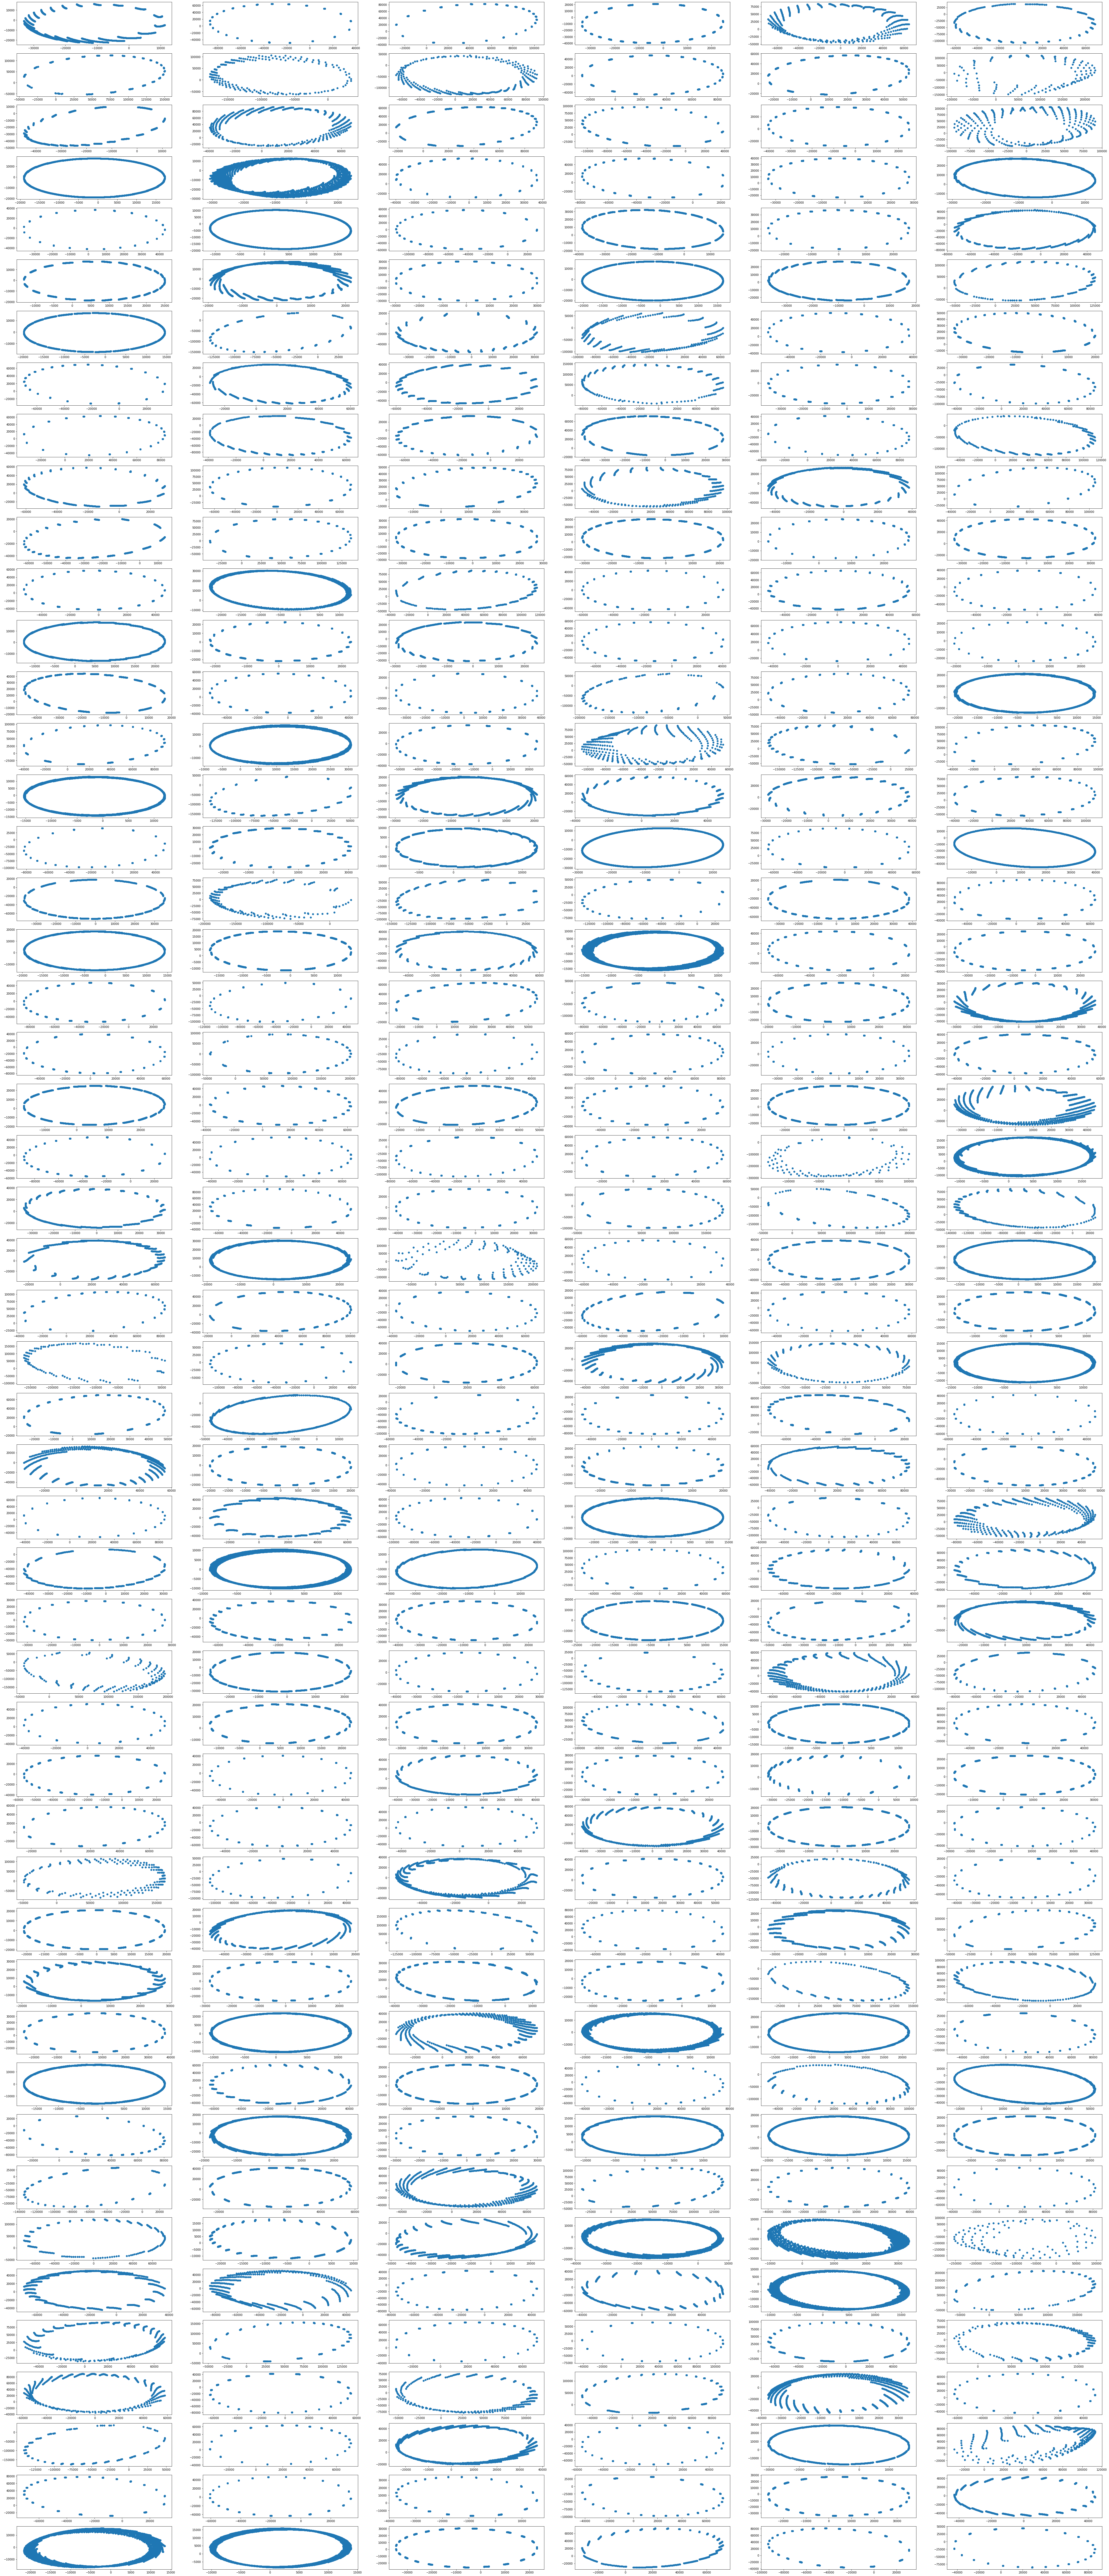

In [18]:
fig = plt.figure(figsize=(70, 170))

i = 1
for sat_id in part_train_new.sat_id.unique()[:]:
    ax = fig.add_subplot(50, 6, i)
    ax.scatter(part_train_new[part_train_new.sat_id == sat_id].x1, part_train_new[part_train_new.sat_id == sat_id].y1)
    i += 1

In [15]:
def shift_to_center_and_rotate(df, train_coefs):
    train_coefs['xc'] = 0.0; train_coefs['yc'] = 0.0
    #shift
    for sat_id in df.sat_id.unique():
        train_coefs.loc[train_coefs.sat_id == sat_id, 'xc'] = (df[df.sat_id == sat_id].x1.max() + df[df.sat_id == sat_id].x1.min()) / 2
        train_coefs.loc[train_coefs.sat_id == sat_id, 'yc'] = (df[df.sat_id == sat_id].y1.max() + df[df.sat_id == sat_id].y1.min()) / 2
    
        df.loc[df.sat_id == sat_id, 'x1'] = df[df.sat_id == sat_id].x1.values - train_coefs[train_coefs.sat_id == sat_id].xc.values
        df.loc[df.sat_id == sat_id, 'y1'] = df[df.sat_id == sat_id].y1.values - train_coefs[train_coefs.sat_id == sat_id].yc.values
    
    train_coefs['small_polyos'] = 0.0; train_coefs['big_polyos'] = 0.0
    #rotate
    train_coefs['vect_max_x'] = 0.0; train_coefs['vect_max_y'] = 0.0
    train_coefs['vect_min_x'] = 0.0; train_coefs['vect_min_y'] = 0.0
    for sat_id in df.sat_id.unique():
        #print(sat_id)
        distances = np.sqrt((df[df.sat_id == sat_id].x1.values) ** 2 + (df[df.sat_id == sat_id].y1.values) ** 2)
        id_min = np.argmin(distances); id_max = np.argmax(distances)
        train_coefs.loc[train_coefs.sat_id == sat_id, 'small_polyos'] = distances[id_min]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'big_polyos'] = distances[id_max]
 
        a = df.loc[df[df.sat_id == sat_id].index[0] + id_max][['x1', 'y1']].values #vector where big polyos
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_x'] = a[0]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_y'] = a[1]
        
#         a1 = df.loc[df[df.sat_id == sat_id].index[0] + id_min][['x1', 'y1']].values #vector where small polyos
#         train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_x'] = a1[0]
#         train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_y'] = a1[1]
        
        cos_teta =  a[0] / np.sqrt(a[0] ** 2 + a[1] ** 2)
        sin_teta = a[1] / np.sqrt(a[0] ** 2 + a[1] ** 2)
        train_coefs.loc[train_coefs.sat_id == sat_id, 'cos_teta'] = cos_teta
        train_coefs.loc[train_coefs.sat_id == sat_id, 'sin_teta'] = sin_teta
        M = [[cos_teta, sin_teta],
            [-sin_teta, cos_teta]]
        coord = (np.dot(M, df[df.sat_id == sat_id][['x1', 'y1']].values.T)).T
        df.loc[df.sat_id == sat_id, 'x1'] = coord[:, 0]
        df.loc[df.sat_id == sat_id, 'y1'] = coord[:, 1]
        
        coord = (np.dot(M, train_coefs[train_coefs.sat_id == sat_id][['vect_max_x', 'vect_max_y']].values.T)).T
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_x'] = coord[:, 0]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_y'] = coord[:, 1]
        
#         coord = (np.dot(M, train_coefs[train_coefs.sat_id == sat_id][['vect_min_x', 'vect_min_y']].values.T)).T
#         train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_x'] = coord[:, 0]
#         train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_y'] = coord[:, 1]
    return df, train_coefs

In [16]:
part_train_new2, train_coefs_new = shift_to_center_and_rotate(part_train_new.copy(), train_coefs.copy())
part_train_new2.head()

epoch  sat_id             x             y  \
id                                                                  
1819  2014-01-01T00:00:00.000       1  10390.313089  -2796.458271   
1820  2014-01-01T00:21:11.845       1  11195.606833   5078.653968   
1821  2014-01-01T00:42:23.690       1   8235.556436  11445.904263   
1822  2014-01-01T01:03:35.534       1   3560.149776  15634.195146   
1823  2014-01-01T01:24:47.379       1  -1580.476891  18023.318335   

                z        Vx        Vy        Vz         x_sim         y_sim  \
id                                                                            
1819  3179.562085  2.520477  6.149930 -2.827599  10405.813755  -2771.180760   
1820  -839.076593 -1.126667  5.826412 -3.255872  11199.853336   5102.405255   
1821 -4680.514023 -3.230227  4.126433 -2.704441   8239.504004  11465.137350   
1822 -7654.177182 -3.964696  2.520867 -1.978151   3569.107805  15652.050271   
1823 -9755.287599 -4.050865  1.296388 -1.346512  -1566.253652  18042.143340   

            z_sim    Vx_sim    Vy_sim    Vz_sim            x1            y1  \
id                                                                            
1819  3166.926302  2.508879  6.152996 -2.826227  22464.809264      0.000000   
1820  -845.930363 -1.130992  5.822303 -3.250049  20522.826356  -8643.701258   
1821 -4680.291877 -3.227356  4.123931 -2.700255  15395.797474 -14779.646660   
1822 -7650.341207 -3.960215  2.520907 -1.976723   9336.148370 -18171.225862   
1823 -9750.982621 -4.047005  1.297625 -1.347010   3443.298838 -19521.366957   

          z_pred1  
id                 
1819  -566.936837  
1820 -1141.809482  
1821 -1494.180131  
1822 -1641.570062  
1823 -1649.350913

In [17]:
train_coefs_new.head()

A         B         C           D  sat_id            xc  \
0  0.105813 -0.506322 -0.830986  428.095768       1 -10813.641476   
1  0.272114  0.582492  0.765522    0.417844       2 -25476.605848   
2  0.043096  0.024531 -0.998760  -11.926576       3  37122.805100   
3  0.153223 -0.843987  0.513590   10.014767       4  -4357.515615   
4  0.274336  0.515361 -0.811837   -5.018759       6  -1883.028679   

             yc  small_polyos    big_polyos    vect_max_x    vect_max_y  \
0  -2748.708889  14922.589858  22464.809264  22464.809264  0.000000e+00   
1   7664.576963  56337.730054  62644.100940  62644.100940  3.637979e-12   
2  23931.263367  53710.956406  70237.976563  70237.976563  3.637979e-12   
3  -9290.982303  28799.283760  30617.204910  30617.204910  0.000000e+00   
4  19410.188447  46529.262061  71514.487824  71514.487824  0.000000e+00   

   vect_min_x  vect_min_y  cos_teta  sin_teta  
0         0.0         0.0  0.949345  0.314236  
1         0.0         0.0  0.956343 -0.292246  
2         0.0         0.0 -0.837368 -0.546639  
3         0.0         0.0 -0.410021 -0.912076  
4         0.0         0.0 -0.665411  0.746477

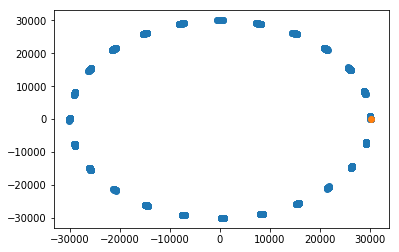

In [18]:
    fig = plt.figure()
    sat_id = 57
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(part_train_new2[part_train_new2.sat_id == sat_id].x1, part_train_new2[part_train_new2.sat_id == sat_id].y1)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_y)
#     ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_y, c='red')

In [23]:
train_coefs_new[train_coefs_new.sat_id == 57]

sat_id         A         B         C         D         xc          yc  \
32      57  0.218106 -0.407193  0.886862 -2.592735  97.574777  333.570707   

    small_polyos    big_polyos    vect_max_x  vect_max_y  vect_min_x  \
32  29974.180786  30113.582344  30113.582344         0.0         0.0   

    vect_min_y  cos_teta  sin_teta  
32         0.0  0.793915  0.608029

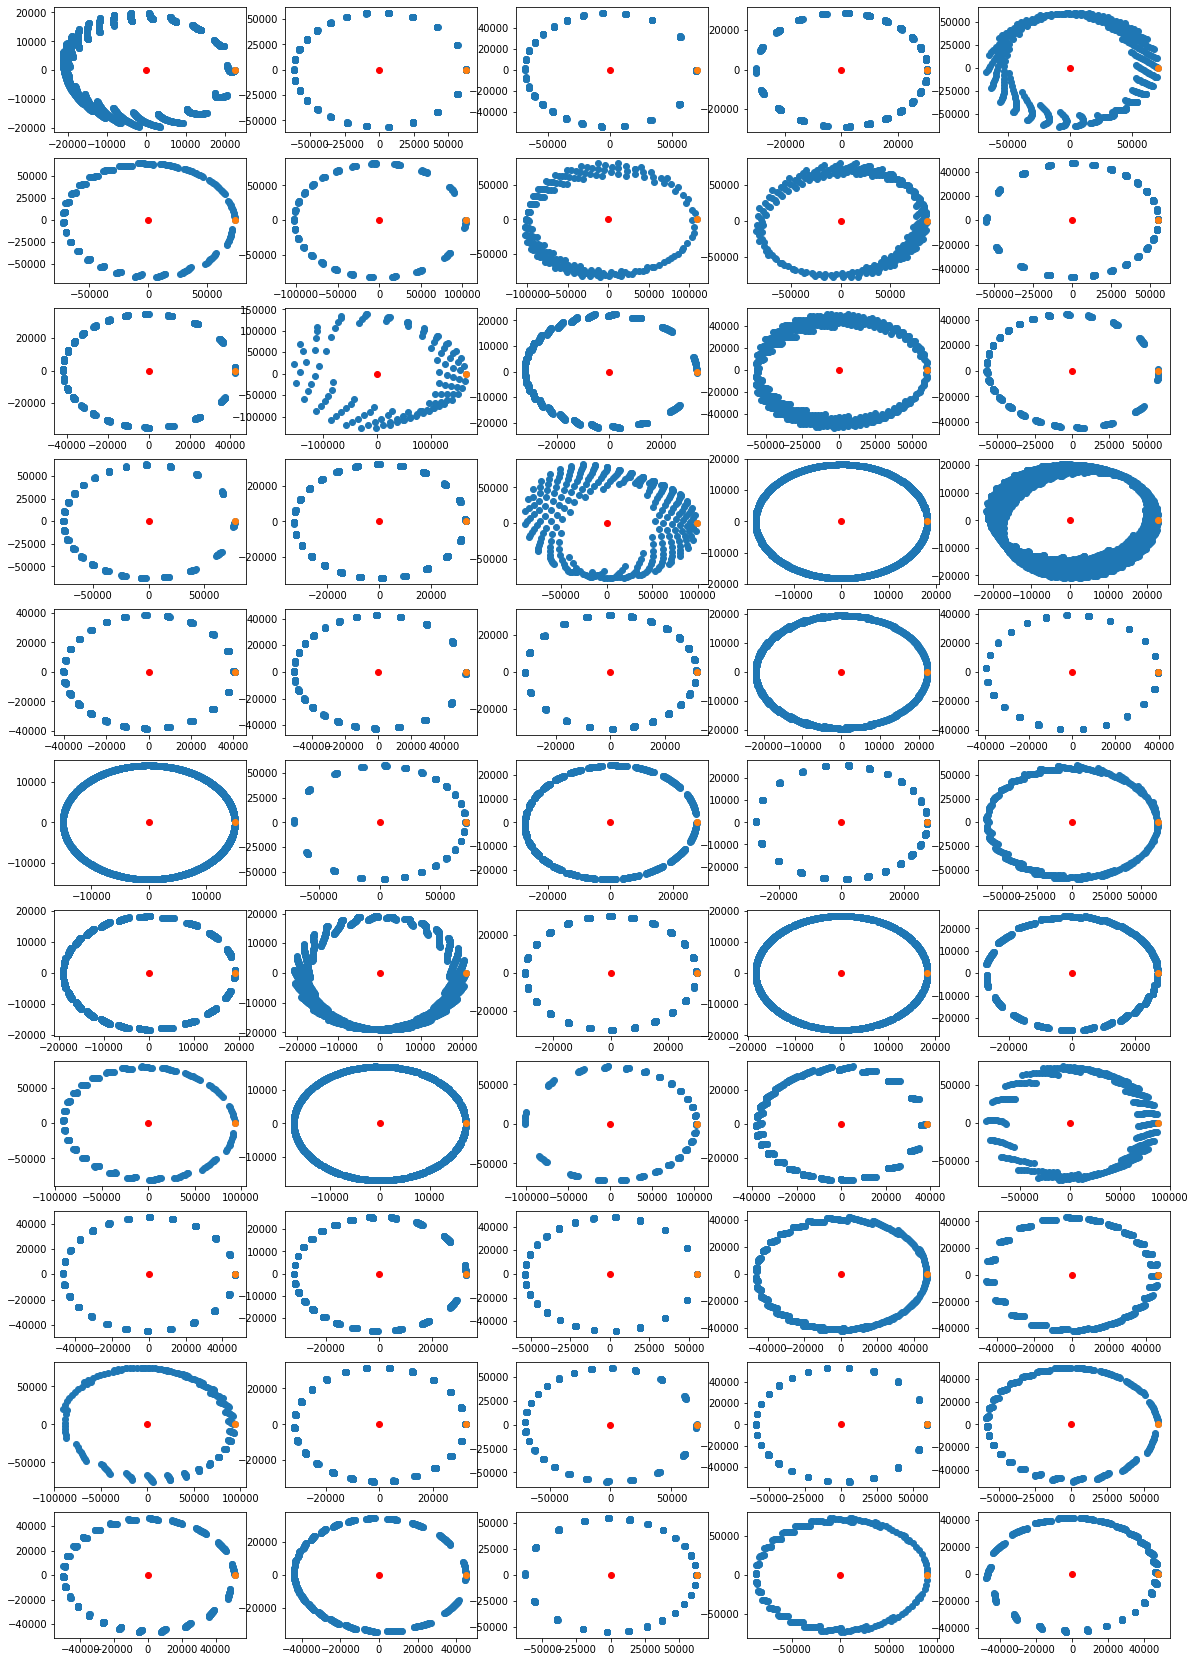

In [24]:
fig = plt.figure(figsize=(20, 30))

i = 1
for sat_id in part_train_new2.sat_id.unique()[:]:
    ax = fig.add_subplot(11, 5, i)
    ax.scatter(part_train_new2[part_train_new2.sat_id == sat_id].x1, part_train_new2[part_train_new2.sat_id == sat_id].y1)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_y)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_y, c='red')
    i += 1
    if i == 56:
        break

# x_pred1, y_pred1 - предсказание в плоскости
# x_pred, y_pred, z_pred - предсказание в 3д

In [19]:
def inv_shift_to_center_and_rotate(df, train_coefs):
    #rotate
    df['x_pred'] = 0.0; df['y_pred'] = 0.0
    for sat_id in df.sat_id.unique():
        #print(sat_id)
        a = train_coefs[train_coefs.sat_id == sat_id][['vect_max_x', 'vect_max_y']].values[0] #vector where big polyos
        
        
        cos_teta =  train_coefs.loc[train_coefs.sat_id == sat_id, 'cos_teta'].values[0]
        sin_teta = train_coefs.loc[train_coefs.sat_id == sat_id, 'sin_teta'].values[0]
        
        M = [[cos_teta, -sin_teta],
            [sin_teta, cos_teta]]
        coord = (np.dot(M, df[df.sat_id == sat_id][['x_pred1', 'y_pred1']].values.T)).T
        df.loc[df.sat_id == sat_id, 'x_pred'] = coord[:, 0]
        df.loc[df.sat_id == sat_id, 'y_pred'] = coord[:, 1]

#     shift
    for sat_id in df.sat_id.unique():
        df.loc[df.sat_id == sat_id, 'x_pred'] = df[df.sat_id == sat_id].x_pred.values + train_coefs[train_coefs.sat_id == sat_id].xc.values
        df.loc[df.sat_id == sat_id, 'y_pred'] = df[df.sat_id == sat_id].y_pred.values + train_coefs[train_coefs.sat_id == sat_id].yc.values

    return df, train_coefs

In [27]:
train_coefs_new

sat_id         A         B         C           D            xc  \
0         1  0.105813 -0.506322 -0.830986  428.095768 -10908.757244   
1         2  0.272114  0.582492  0.765522    0.417844 -25476.842324   
2         3  0.043096  0.024531 -0.998760  -11.926576  37123.834047   
3         4  0.153223 -0.843987  0.513590   10.014767  -4360.622629   
4         6  0.274336  0.515361 -0.811837   -5.018759  -1880.164977   
..      ...       ...       ...       ...         ...           ...   
295     588  0.125918 -0.976265 -0.161297  -16.112357   1793.766874   
296     593  0.019868 -0.597865 -0.800678   16.049450  -5803.455894   
297     595  0.932706 -0.259384  0.249848    0.552124  20037.922568   
298     596  0.095042 -0.412591 -0.905811   13.358301 -31337.315829   
299     597  0.075495  0.082944  0.993652   -3.269405  21751.460904   

               yc  small_polyos    big_polyos    vect_max_x    vect_max_y  \
0    -3284.816408  14922.589858  22464.809264  22464.809264 -9.094947e-13   
1     7663.915917  56337.730054  62644.100940  62644.100940  0.000000e+00   
2    23930.676956  53710.956406  70237.976563  70237.976563  3.637979e-12   
3    -9257.666886  28799.283760  30617.204910  30617.204910  0.000000e+00   
4    19403.562107  46529.262061  71514.487824  71514.487824  0.000000e+00   
..            ...           ...           ...           ...           ...   
295   3669.417051  10701.346017  12221.874919  12221.874919  0.000000e+00   
296   2110.910996  28243.781837  29099.354847  29099.354847  0.000000e+00   
297  21533.125293  45867.460961  56382.158095  56382.158095  0.000000e+00   
298  22640.937261  54122.200086  66745.415963  66745.415963  0.000000e+00   
299 -20783.518661  61053.900961  68551.683129  68551.683129  0.000000e+00   

     vect_min_x  vect_min_y  cos_teta  sin_teta  
0           0.0         0.0  0.949345  0.314236  
1           0.0         0.0  0.956343 -0.292246  
2           0.0         0.0 -0.837368 -0.546639  
3           0.0         0.0 -0.410021 -0.912076  
4           0.0         0.0 -0.665411  0.746477  
..          ...         ...       ...       ...  
295         0.0         0.0 -0.177417  0.984136  
296         0.0         0.0 -0.933480  0.358629  
297         0.0         0.0 -0.666815 -0.745223  
298         0.0         0.0  0.838346 -0.545139  
299         0.0         0.0 -0.742007  0.670392  

[300 rows x 15 columns]

In [20]:
def inv_new_coord(df, train_coefs):
    for sat_id in df.sat_id.unique():
        # print(sat_id)
        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id][['A', 'B', 'C', 'D']].values[0]
        d = np.sqrt(B ** 2 + C ** 2)
        
        # Mx(-alpha) * My(beta)
        M = [[d/np.sqrt(A ** 2 + d ** 2), 0, A / np.sqrt(A ** 2 + d ** 2)],
             [-B*A/d/ np.sqrt(A ** 2 + d ** 2), C/d, B / np.sqrt(A ** 2 + d ** 2)],
             [-C*A/d/ np.sqrt(A ** 2 + d ** 2), -B/d, C / np.sqrt(A ** 2 + d ** 2)]]        

        sz = df[df.sat_id == sat_id].shape[0]
        
        coord = (np.dot(M, df[df.sat_id == sat_id][['x_pred', 'y_pred', 'z_pred1']].values.T) \
                + np.array([np.zeros(sz), np.zeros(sz), D/C * np.ones(sz)])).T
        df.loc[df.sat_id == sat_id, 'x_pred'] = coord[:, 0]
        df.loc[df.sat_id == sat_id, 'y_pred'] = coord[:, 1]
        df.loc[df.sat_id == sat_id, 'z_pred'] = coord[:, 2]
    return df

In [21]:
part_train_inv = part_train_new2.copy()
part_train_inv['x_pred1'] = part_train_inv['x1'].copy()
part_train_inv['y_pred1'] = part_train_inv['y1'].copy()
inv_shift_to_center_and_rotate(part_train_inv, train_coefs_new)
# check for inverse transform in 2d
print(np.sum(np.abs(part_train_inv['x_pred'].values - part_train_new['x1'].values) \
       + np.abs(part_train_inv['y_pred'].values - part_train_new['y1'].values)))
# inv_new_coord(part_train_inv, train_coefs_new)
# part_train_inv.head()

1.5511805084821029e-06


In [33]:
# plot check in 2d
# fig = plt.figure(figsize=(20, 30))
# i = 1
# for sat_id in part_train_inv.sat_id.unique()[:]:
#     ax = fig.add_subplot(10, 5, i)
#     ax.scatter(part_train_inv[part_train_inv.sat_id == sat_id].x_pred, part_train_inv[part_train_inv.sat_id == sat_id].y_pred, c='blue')
#     ax.scatter(part_train_new[part_train_new.sat_id == sat_id].x1, part_train_new[part_train_new.sat_id == sat_id].y1, c='green')
#     i += 1
#     if i == 51:
#         break

In [22]:
part_train_inv1 = inv_new_coord(part_train_inv.copy(), train_coefs_new)
part_train_inv1.head()

epoch  sat_id             x             y  \
id                                                                  
1819  2014-01-01T00:00:00.000       1  10390.313089  -2796.458271   
1820  2014-01-01T00:21:11.845       1  11195.606833   5078.653968   
1821  2014-01-01T00:42:23.690       1   8235.556436  11445.904263   
1822  2014-01-01T01:03:35.534       1   3560.149776  15634.195146   
1823  2014-01-01T01:24:47.379       1  -1580.476891  18023.318335   

                z        Vx        Vy        Vz         x_sim         y_sim  \
id                                                                            
1819  3179.562085  2.520477  6.149930 -2.827599  10405.813755  -2771.180760   
1820  -839.076593 -1.126667  5.826412 -3.255872  11199.853336   5102.405255   
1821 -4680.514023 -3.230227  4.126433 -2.704441   8239.504004  11465.137350   
1822 -7654.177182 -3.964696  2.520867 -1.978151   3569.107805  15652.050271   
1823 -9755.287599 -4.050865  1.296388 -1.346512  -1566.253652  18042.143340   

      ...    Vy_sim    Vz_sim            x1            y1      z_pred1  \
id    ...                                                                
1819  ...  6.152996 -2.826227  22464.809264      0.000000  -566.936837   
1820  ...  5.822303 -3.250049  20522.826356  -8643.701258 -1141.809482   
1821  ...  4.123931 -2.700255  15395.797474 -14779.646660 -1494.180131   
1822  ...  2.520907 -1.976723   9336.148370 -18171.225862 -1641.570062   
1823  ...  1.297625 -1.347010   3443.298838 -19521.366957 -1649.350913   

           x_pred1       y_pred1        x_pred        y_pred       z_pred  
id                                                                         
1819  22464.809264      0.000000  10390.313089  -2796.458271  3179.562085  
1820  20522.826356  -8643.701258  11195.606833   5078.653968  -839.076593  
1821  15395.797474 -14779.646660   8235.556436  11445.904263 -4680.514023  
1822   9336.148370 -18171.225862   3560.149776  15634.195146 -7654.177182  
1823   3443.298838 -19521.366957  -1580.476891  18023.318335 -9755.287599  

[5 rows x 22 columns]

In [23]:
print(np.sum(np.abs(part_train_inv1['x_pred'].values - part_train_new['x'].values)))

1.0198862067933856e-06


In [24]:
# check for inverse transform in 3d
print(np.sum(np.abs(part_train_inv1['x_pred'].values - part_train_new['x'].values) \
       + np.abs(part_train_inv1['y_pred'].values - part_train_new['y'].values) \
       + np.abs(part_train_inv1['z_pred'].values - part_train_new['z'].values)))

2.815467645558324e-06


In [25]:
part_train_inv1[part_train_inv1.sat_id == 2].head()

epoch  sat_id             x             y  \
id                                                                  
5828  2014-01-01T00:00:00.000       2  33148.668886 -14110.640743   
5829  2014-01-01T01:47:19.603       2  34524.849803   5438.883966   
5830  2014-01-01T03:34:39.205       2  26209.000418  23782.292036   
5831  2014-01-01T05:21:58.808       2  12865.236538  37948.818156   
5832  2014-01-01T07:09:18.410       2  -2122.829466  47734.661499   

                 z        Vx        Vy        Vz         x_sim         y_sim  \
id                                                                             
5828   -968.074861  1.128804  2.826089 -2.540709  33421.694365 -13513.388445   
5829 -16279.040266 -0.652929  3.071909 -2.099883  34479.954736   6084.116849   
5830 -27262.969421 -1.795643  2.552720 -1.303775  26013.271173  24325.975371   
5831 -33308.619162 -2.262068  1.847384 -0.604569  12658.477848  38377.608320   
5832 -35452.597642 -2.350057  1.209939 -0.090077  -2284.126205  48080.268831   

      ...    Vy_sim    Vz_sim            x1            y1     z_pred1  \
id    ...                                                               
5828  ...  2.851149 -2.530708  62644.100940  3.637979e-12   59.406849   
5829  ...  3.063011 -2.069545  56744.507356  2.415981e+04  100.469948   
5830  ...  2.533284 -1.277723  42265.966028  4.195454e+04  114.070470   
5831  ...  1.831557 -0.588909  24641.299691  5.218525e+04  106.855238   
5832  ...  1.199491 -0.082207   7095.044194  5.632410e+04   87.297908   

           x_pred1       y_pred1        x_pred        y_pred        z_pred  
id                                                                          
5828  62644.100940  3.637979e-12  33148.668886 -14110.640743   -968.074861  
5829  56744.507356  2.415981e+04  34524.849803   5438.883966 -16279.040266  
5830  42265.966028  4.195454e+04  26209.000418  23782.292036 -27262.969421  
5831  24641.299691  5.218525e+04  12865.236538  37948.818156 -33308.619162  
5832   7095.044194  5.632410e+04  -2122.829466  47734.661499 -35452.597642  

[5 rows x 22 columns]

In [26]:
part_train_inv1.sat_id.unique()

array([  1,   2,   3,   4,   6,   9,  16,  20,  22,  24,  25,  26,  27,
        28,  29,  32,  34,  35,  36,  37,  38,  39,  40,  41,  42,  44,
        45,  49,  51,  52,  53,  54,  57,  59,  63,  64,  68,  70,  75,
        82,  84,  86,  89,  90,  91,  92,  93,  96,  98, 100, 101, 102,
       105, 106, 109, 110, 112, 113, 114, 117, 118, 120, 121, 123, 124,
       125, 126, 127, 128, 130, 132, 133, 135, 138, 142, 143, 144, 145,
       149, 151, 152, 153, 155, 156, 158, 159, 160, 162, 164, 165, 166,
       169, 170, 172, 173, 177, 178, 183, 186, 187, 188, 191, 193, 194,
       195, 197, 203, 205, 206, 207, 208, 209, 210, 211, 213, 219, 220,
       222, 223, 225, 227, 228, 229, 230, 233, 236, 239, 240, 241, 242,
       243, 244, 245, 247, 248, 251, 252, 253, 254, 261, 263, 264, 265,
       268, 270, 275, 277, 278, 281, 284, 288, 292, 293, 294, 298, 299,
       301, 304, 306, 309, 310, 312, 314, 316, 319, 324, 326, 332, 333,
       342, 343, 344, 347, 348, 349, 356, 357, 358, 359, 362, 36

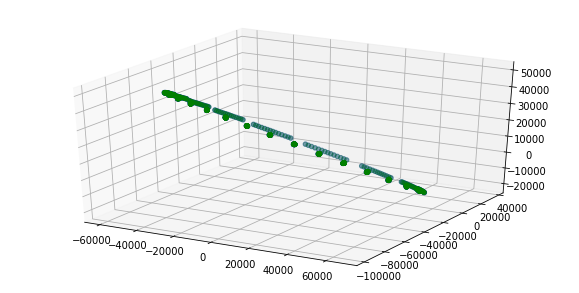

In [27]:
# good example
fig = plt.figure(figsize=(10, 5))
sat_id = 9
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(part_train_inv1[part_train_inv1.sat_id == sat_id].x_pred, part_train_inv1[part_train_inv1.sat_id == sat_id].y_pred, part_train_inv1[part_train_inv1.sat_id == sat_id].z_pred, c='blue')
ax.scatter(part_train_new[part_train_new.sat_id == sat_id].x, part_train_new[part_train_new.sat_id == sat_id].y, part_train_new[part_train_new.sat_id == sat_id].z, c='green')

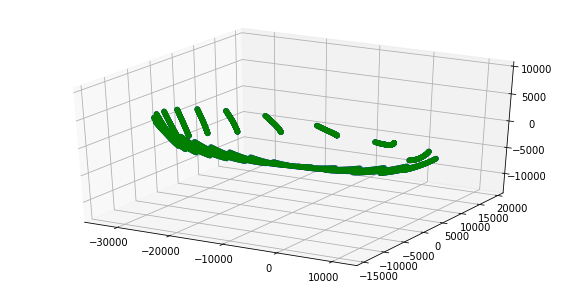

In [28]:
# bad example
fig = plt.figure(figsize=(10, 5))
sat_id = 1
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(part_train_inv1[part_train_inv1.sat_id == sat_id].x_pred, part_train_inv1[part_train_inv1.sat_id == sat_id].y_pred, part_train_inv1[part_train_inv1.sat_id == sat_id].z_pred, c='blue')
ax.scatter(part_train_new[part_train_new.sat_id == sat_id].x, part_train_new[part_train_new.sat_id == sat_id].y, part_train_new[part_train_new.sat_id == sat_id].z, c='green')

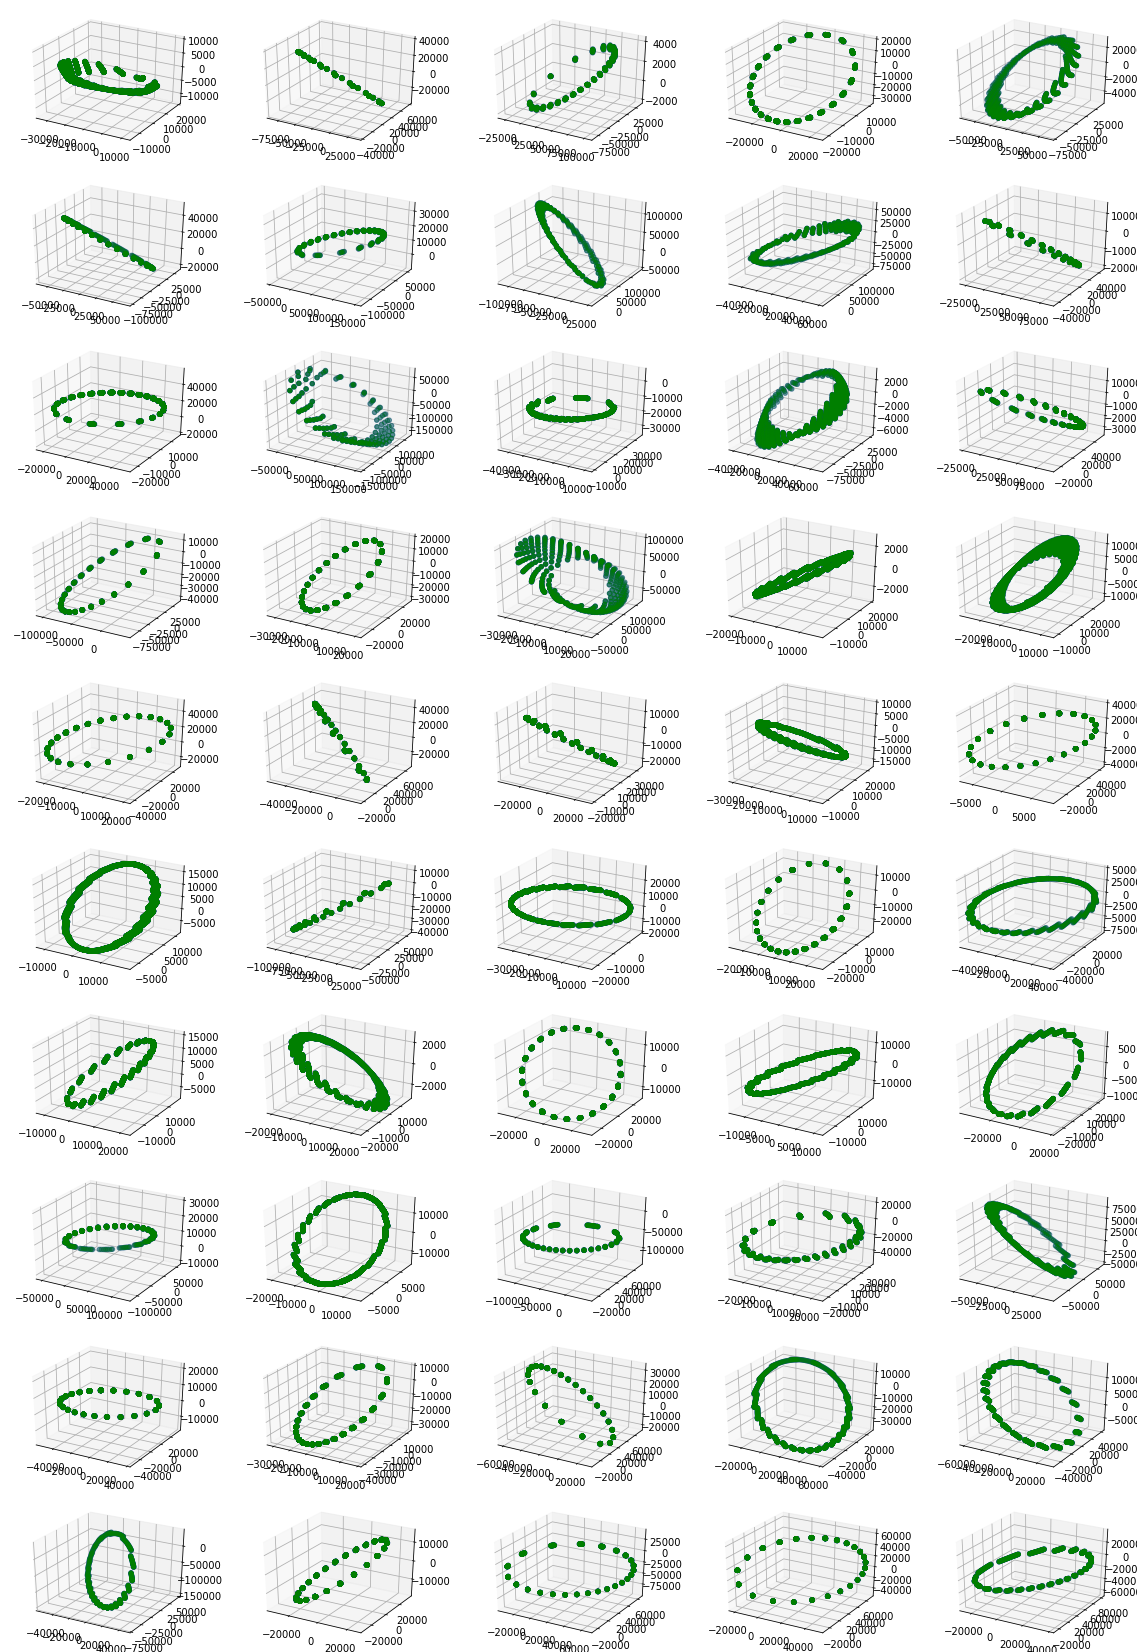

In [29]:
fig = plt.figure(figsize=(20, 30))
i = 1
for sat_id in part_train_inv1.sat_id.unique()[:]:
    ax = fig.add_subplot(10, 5, i, projection='3d')
    ax.scatter(part_train_inv1[part_train_inv1.sat_id == sat_id].x_pred, part_train_inv1[part_train_inv1.sat_id == sat_id].y_pred, part_train_inv1[part_train_inv1.sat_id == sat_id].z_pred, c='blue')
    ax.scatter(part_train_new[part_train_new.sat_id == sat_id].x, part_train_new[part_train_new.sat_id == sat_id].y, part_train_new[part_train_new.sat_id == sat_id].z, c='green')
    i += 1
    if i == 51:
        break